In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

### A reward function which MultiarmedBandit algorithm struggles to fit well.

####  If, for example, I change coefficient at x^5 on bigger one, the algorithm will perform better

In [71]:
def func(x):
    return x**3/4-x**2+x-2*x**4+2.1*x**5

In [72]:
def reward_function(x: int, arms: int) -> np.array:
    x = x / arms
    return np.random.normal(loc=func(x), scale=1)

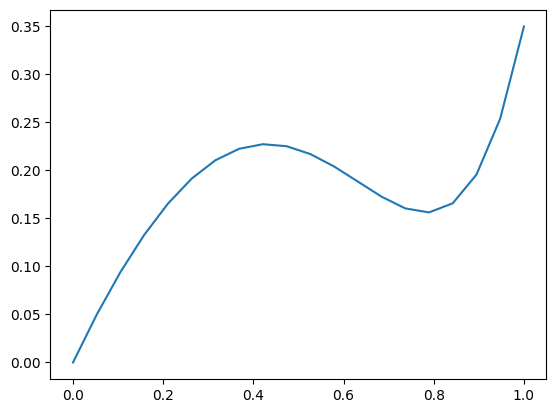

In [73]:
X = np.linspace(0, 1, 20)
Y = func(X)
plt.plot(X, Y)
plt.show()

In [74]:
def eps_greedy(epsilon, Q) -> int:
    i: float = np.argmax(Q)

    dim = np.size(Q)
    action_space = range(0,dim,1)
    if rd.random() <= 1 - epsilon:
        return i
    else:
       np.delete(action_space,i)
       return np.random.choice(action_space)

In [99]:
def multitask_constant_step(max_iter, T, epsilon, arm_number, step_size):
    rows, cols = T, arm_number
    init_zero = np.array([([0]*cols) for i in range(rows)]) 

    Q=init_zero
    N=init_zero
    R=np.zeros(max_iter)

    for i in range(max_iter):
        for t in range(T):
            task_Q = Q[t,:]
            task_N = N[t,:]
            action = eps_greedy(epsilon,task_Q)
            
            Reward = reward_function(action, arm_number)
            R[i] += Reward
            task_N[action] += 1
            difference = Reward - task_Q[action]
            # step_size = 1 / np.clip(task_N[action], 1, np.inf)
            task_Q[action] += step_size * difference
            Q[t,:] = task_Q
            N[t,:] = task_N
        R[i] = R[i] / T

    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.plot(R,color='b')
    plt.xticks(np.arange(0,max_iter+1,100))
    plt.show()
    plt.close()

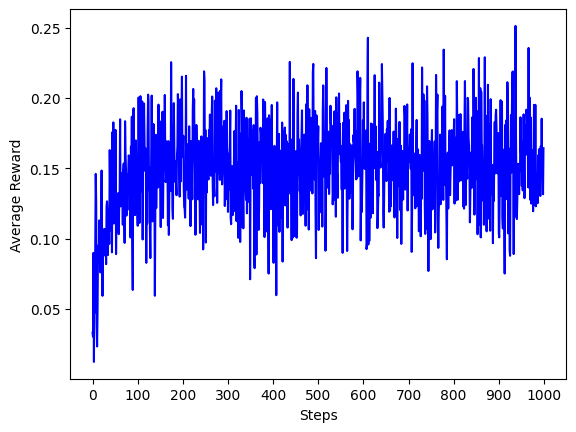

In [102]:
max_iter=1000
T = 1000
epsilon=0.3
arm_number=10
step_size=0.3
multitask_constant_step(max_iter ,T, epsilon, arm_number, step_size)